# Import Data And Libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

# Exploratory Data Analysis (EDA)

In [3]:
data.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [4]:
data.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [5]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# Distribution of Movie/TV Show

Text(0.5, 1.0, 'Distribution of Movie/TV Show')

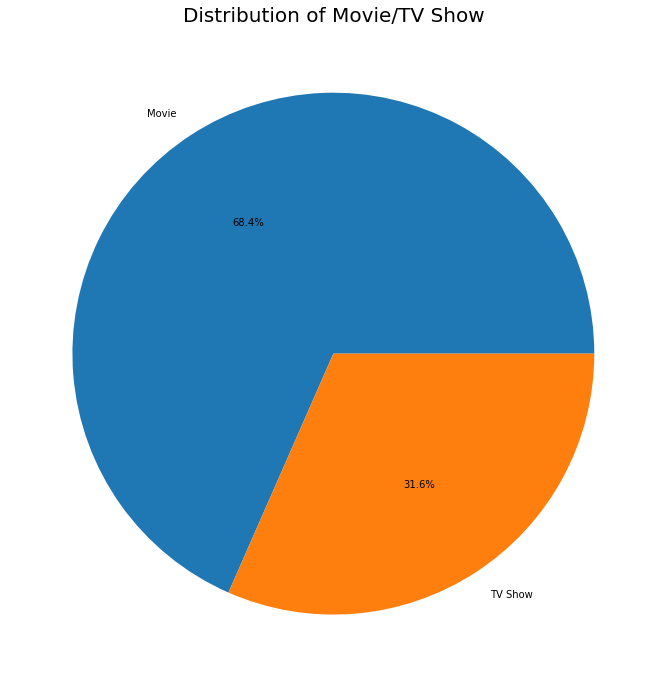

In [6]:
bar, ax = plt.subplots(figsize = (12,12))
plt.pie(data['type'].value_counts(), labels = data['type'].value_counts().index, autopct="%.1f%%")
plt.title('Distribution of Movie/TV Show', size=20)

Text(0.5, 1.0, 'Release Frequency over Years')

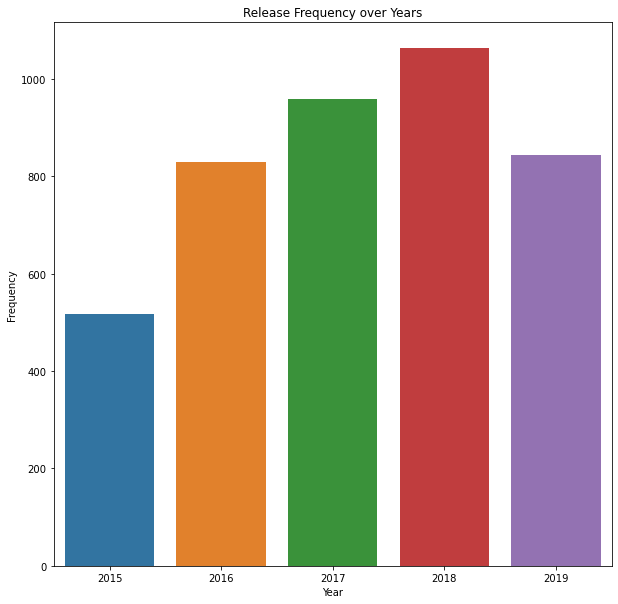

In [7]:
bar, ax = plt.subplots(figsize = (10,10))
sns.barplot(x = data['release_year'].value_counts().index[:5], y = data['release_year'].value_counts()[:5])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Release Frequency over Years')

# Growth of Movie/TV Show over Years

In [8]:
movie_data = data[data['type'] == 'Movie']
tv_show_data = data[data['type'] == 'TV Show']
# bar,ax = plt.subplots(1,2,figsize=(10,10))
temp = data[['type', 'release_year']]
temp = temp.value_counts().to_frame()
temp.reset_index(level=[0,1], inplace=True)
temp = temp.rename(columns = {0:'count'})
temp = pd.concat([temp[temp['type'] == 'Movie'][:5], temp[temp['type']== 'TV Show'][:5]])


Text(0.5, 1.0, 'Growth of Movie/TV Show over Years')

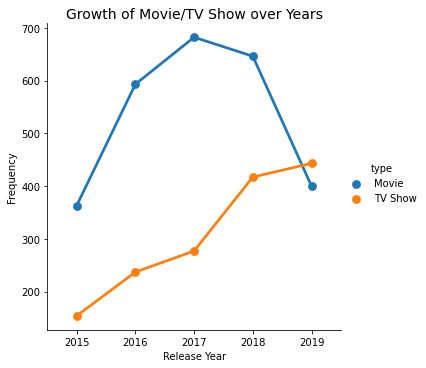

In [9]:
# ax, bar = plt.subplots(figsize = (10,10))
sns.catplot(x = 'release_year', y = 'count', hue = 'type', data = temp, kind = 'point')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Growth of Movie/TV Show over Years', size=14)

# Histogram For Movie Duration

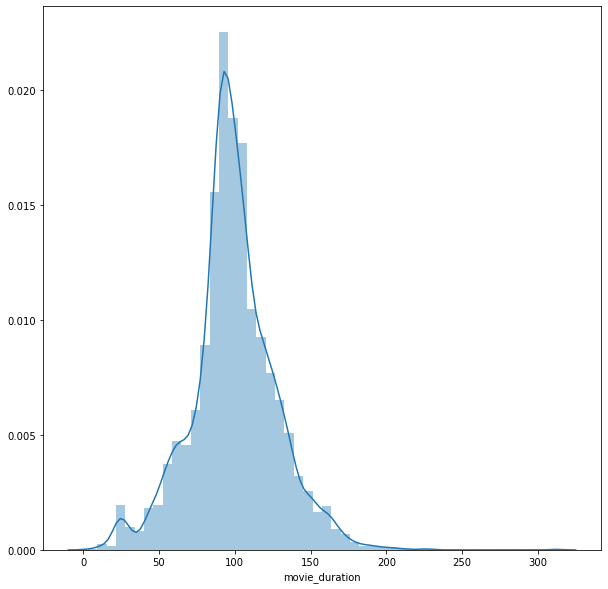

In [10]:
temp = data[data['type'] == 'Movie'].reset_index()
temp['movie_duration'] = [int(x.split()[0]) for x in temp['duration'][temp['type'] == 'Movie']]
temp['movie_duration']
bar, ax = plt.subplots(figsize = (10,10))
sns.distplot(a = temp['movie_duration'])

# Famous Director in Movie/TV Show

In [11]:
temp = list()
clean_data = data.dropna()
clean_data.reset_index(inplace=True)
for ind, element in clean_data.iterrows():
    type_show = element['type']
    for director in str(element['director']).split(','):
        temp.append([type_show, director])
director_data = pd.DataFrame(temp, columns= ['type', 'director'])
director_data

,type,director
0,Movie,Richard Finn
1,Movie,Tim Maltby
2,Movie,Fernando Lebrija
3,Movie,Gabe Ibáñez
4,Movie,Rodrigo Toro
...,...,...
4242,TV Show,Thomas Astruc
4243,TV Show,Vikramaditya Motwane
4244,TV Show,Anurag Kashyap
4245,TV Show,Jung-ah Im


In [12]:
director_data_count = director_data.value_counts().to_frame()
director_data_count.reset_index(level=[0,1], inplace=True)
famous_director = director_data_count.rename(columns={0:'count'})
# famous_director = pd.concat([famous_director[famous_director['type'] == 'Movie'].iloc[:5,:], famous_director[famous_director['type'] == 'TV Show'].iloc[:5,:]])
# famous_director.reset_index(inplace=True)
famous_director

,type,director,count
0,Movie,Jan Suter,18
1,Movie,Raúl Campos,18
2,Movie,Jay Karas,14
3,Movie,Marcus Raboy,12
4,Movie,Jay Chapman,12
...,...,...,...
3289,Movie,Maximilian Erlenwein,1
3290,Movie,Max McGill,1
3291,Movie,Max Martini,1
3292,Movie,Max Lang,1


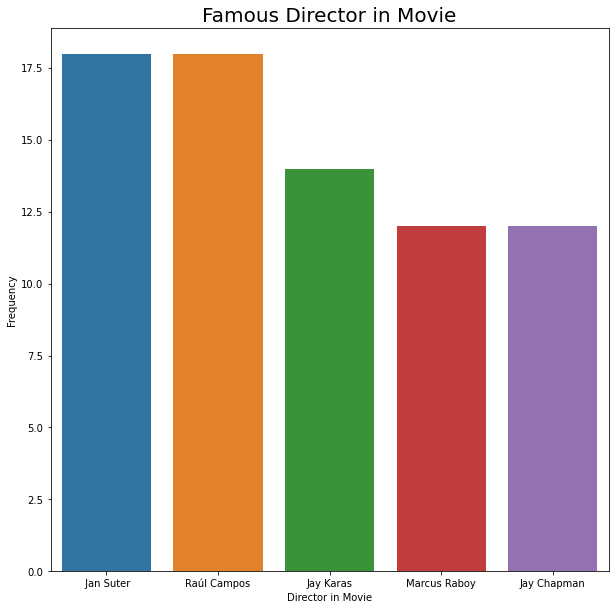

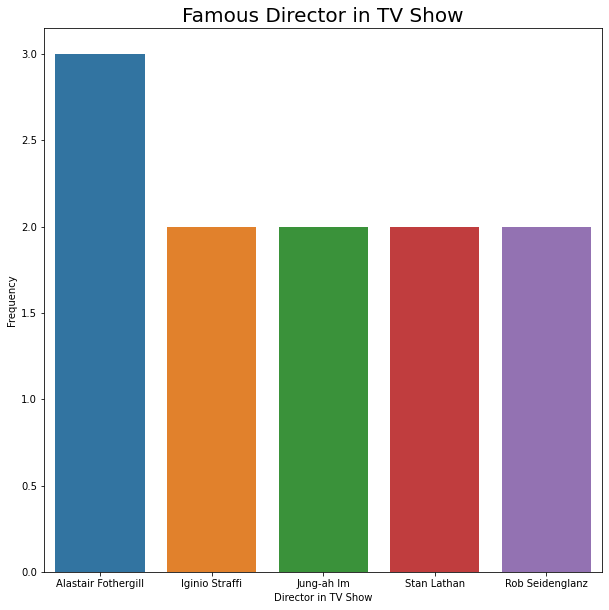

In [13]:

for unique_type in famous_director['type'].unique():
    bar, ax = plt.subplots(figsize=(10,10))
    sns.barplot(x = 'director', y = 'count', data = famous_director[famous_director['type'] == unique_type].iloc[:5])
    plt.xlabel('Director in {}'.format(str(unique_type)))
    plt.ylabel('Frequency')
    plt.title('Famous Director in {}'.format(str(unique_type)), size=20)

# Top Three countries with most TV Shows

In [14]:
temp = list()
clean_data = data.dropna()
clean_data.reset_index(inplace=True)
for ind, element in clean_data.iterrows():
    type_show = element['type']
    for country in str(element['country']).split(','):
        temp.append([type_show, country])
country_data = pd.DataFrame(temp, columns= ['type', 'country'])

country = country_data.value_counts().to_frame()
country.reset_index(level=[0,1], inplace = True)
country = country.rename(columns = {0:'count'})
country

,type,country,count
0,Movie,United States,1480
1,Movie,India,732
2,Movie,United Kingdom,237
3,Movie,United States,205
4,Movie,Canada,111
...,...,...,...
183,Movie,Somalia,1
184,Movie,Soviet Union,1
185,Movie,Sudan,1
186,Movie,Iraq,1


Text(0.5, 1.0, 'Top Three countries with most TV Shows')

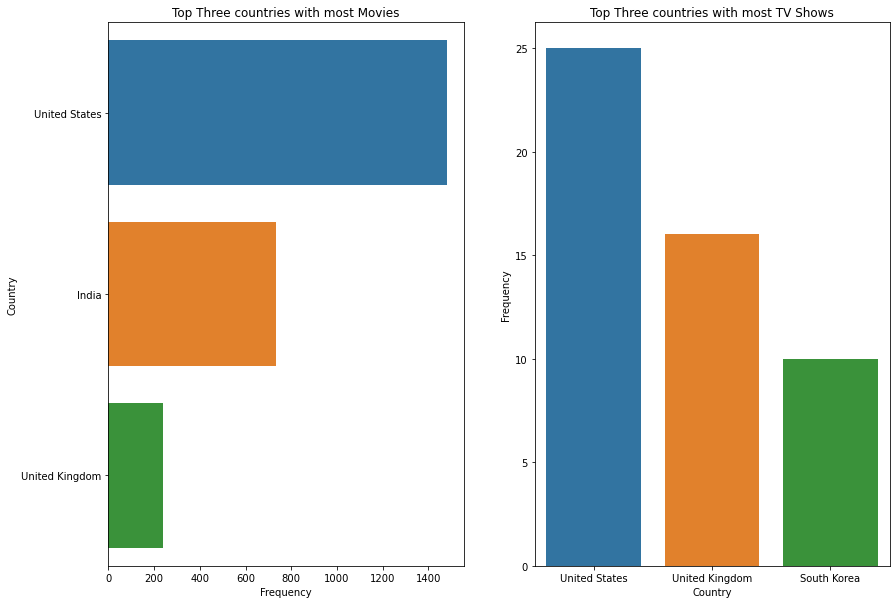

In [15]:
bar, ax = plt.subplots(1,2, figsize=(14,10))
sns.barplot(x = 'count', y ='country', data = country[country['type'] == 'Movie'].iloc[:3,:], ax = ax[0])
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Country')
ax[0].set_title('Top Three countries with most Movies')
sns.barplot(x = 'country', y = 'count', data = country[country['type'] == 'TV Show'].iloc[:3,:], ax = ax[1])
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Top Three countries with most TV Shows')

# Expansion of TV Show\Movie over Years in U.S.A

In [16]:
temp = data[['type','release_year']][data['country'] == 'United States']
temp = temp.value_counts().to_frame()
temp.reset_index(level=[0,1], inplace =True)
temp = temp.rename(columns = {0:'count'})
temp

,type,release_year,count
0,Movie,2017,260
1,Movie,2018,219
2,Movie,2016,185
3,TV Show,2019,164
4,Movie,2019,160
...,...,...,...
90,TV Show,2000,1
91,Movie,1982,1
92,Movie,1983,1
93,Movie,1985,1


Text(0.5, 1.0, 'Expansion of TV Show over Years in U.S.A')

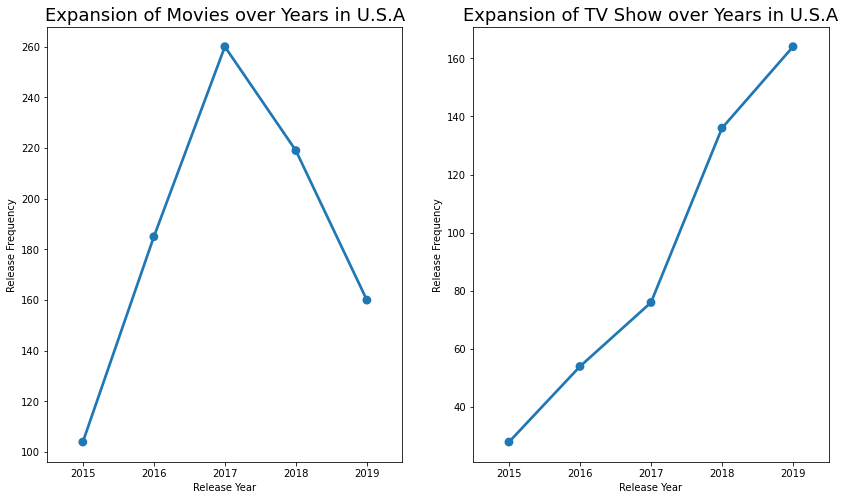

In [17]:
bar, ax = plt.subplots(1,2, figsize = (14,8))
sns.pointplot(x = 'release_year', y = 'count', data = temp[temp['type'] == 'Movie'].iloc[:5], kind = 'point', ax = ax[0])
sns.pointplot(x = 'release_year', y = 'count', data = temp[temp['type'] == 'TV Show'].iloc[:5], kind = 'point', ax = ax[1])
ax[0].set_xlabel('Release Year')
ax[0].set_ylabel('Release Frequency')
ax[0].set_title('Expansion of Movies over Years in U.S.A', size=18)
ax[1].set_xlabel('Release Year')
ax[1].set_ylabel('Release Frequency')
ax[1].set_title('Expansion of TV Show over Years in U.S.A', size=18)


# Most Famous Cast in TV Show

In [18]:
temp = list()
clean_data = data.dropna()
clean_data.reset_index(inplace=True)
for ind, element in clean_data.iterrows():
    type_show = element['type']
    for cast in str(element['cast']).split(','):
        temp.append([type_show, cast])
cast_data = pd.DataFrame(temp, columns= ['type', 'country'])


cast = cast_data.value_counts().to_frame()
cast.reset_index(level=[0,1], inplace=True)
cast = cast.rename(columns = {0:'count'})
cast

,type,country,count
0,Movie,Anupam Kher,29
1,Movie,Om Puri,25
2,Movie,Shah Rukh Khan,23
3,Movie,Boman Irani,23
4,Movie,Paresh Rawal,22
...,...,...,...
20362,Movie,Mike Judge,1
20363,Movie,Mike Houston,1
20364,Movie,Mike Hanford,1
20365,Movie,Mike Ghader,1


Text(0.5, 1.0, 'Most Famous Cast in TV Show')

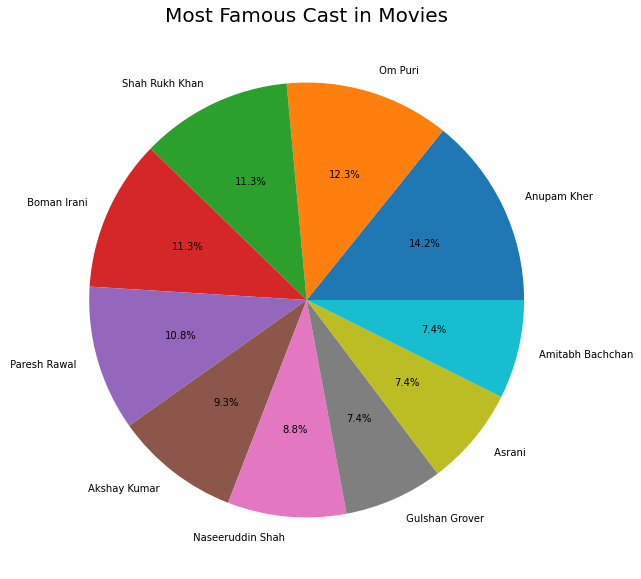

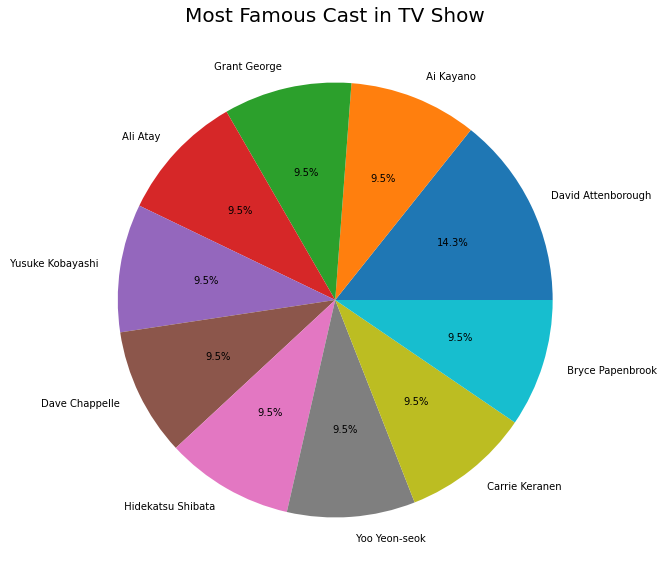

In [19]:
bar, ax = plt.subplots(figsize= (10,10))
plt.pie(x = cast['count'][cast['type'] == 'Movie'][:10] , labels = cast['country'][cast['type'] == 'Movie'][:10], autopct="%.1f%%")
plt.title('Most Famous Cast in Movies', size=20)
bar, ax = plt.subplots(figsize= (10,10))
plt.pie(x = cast['count'][cast['type'] == 'TV Show'][:10] , labels = cast['country'][cast['type'] == 'TV Show'][:10], autopct="%.1f%%")
plt.title('Most Famous Cast in TV Show', size=20)

# Top Two Genre in last 10 years

In [20]:
temp = list()
clean_data = data.dropna()
clean_data.reset_index(inplace=True)
for ind, element in clean_data.iterrows():
    type_show = element['release_year']
    for cast in str(element['listed_in']).split(','):
        temp.append([type_show, cast])
cast_data = pd.DataFrame(temp, columns= ['release_year', 'cast'])
cast_data

,release_year,cast
0,2019,Children & Family Movies
1,2019,Comedies
2,2017,Comedies
3,2014,International Movies
4,2014,Sci-Fi & Fantasy
...,...,...
8360,2019,Korean TV Shows
8361,2019,Stand-Up Comedy & Talk Shows
8362,2014,International TV Shows
8363,2014,Romantic TV Shows


In [21]:
cast = cast_data.value_counts().to_frame()
cast.reset_index(level=[0,1], inplace=True)
cast = cast.rename(columns = {0:'count'})


years = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]
year_data = list()
for year in years:
    temp1 = cast[cast['release_year'] == year].iloc[0,:]
    temp2 = cast[cast['release_year'] == year].iloc[1,:]
    year_data.append(list(temp1))
    year_data.append(list(temp2))
    
year = pd.DataFrame(year_data, columns=('years', 'genre', 'count'))


Text(0.5, 1.0, 'Top Two Genre in last 10 years')

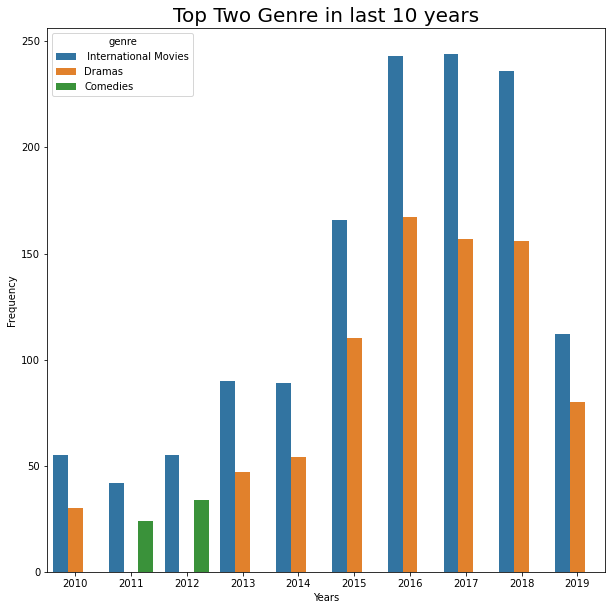

In [22]:
bar, ax = plt.subplots(figsize=(10,10))
sns.barplot(x = 'years', y ='count', hue='genre', data = year)
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Top Two Genre in last 10 years', size=20)

# Maximum Growth of Rating in specific year

In [23]:
temp = data[['release_year', 'rating']]
temp = temp.value_counts().to_frame()
temp.reset_index(level =  [0,1], inplace = True)
temp = temp.rename(columns = {0:'count'})
rating = pd.DataFrame([],columns = ('release_year', 'rating', 'count'))
for rating_element in data['rating'].unique():
    rating = pd.concat([rating, temp[temp['rating'] == rating_element].iloc[:1,:]])
rating

,release_year,rating,count
10,2017,TV-PG,105
0,2018,TV-MA,491
38,2018,TV-Y7-FV,27
31,2017,TV-Y7,36
3,2018,TV-14,291
16,2016,R,66
33,2018,TV-Y,30
19,2015,NR,55
55,2017,PG-13,22
42,2019,TV-G,25


Text(0.5, 1.0, 'Maximum Growth of Rating in specific year')

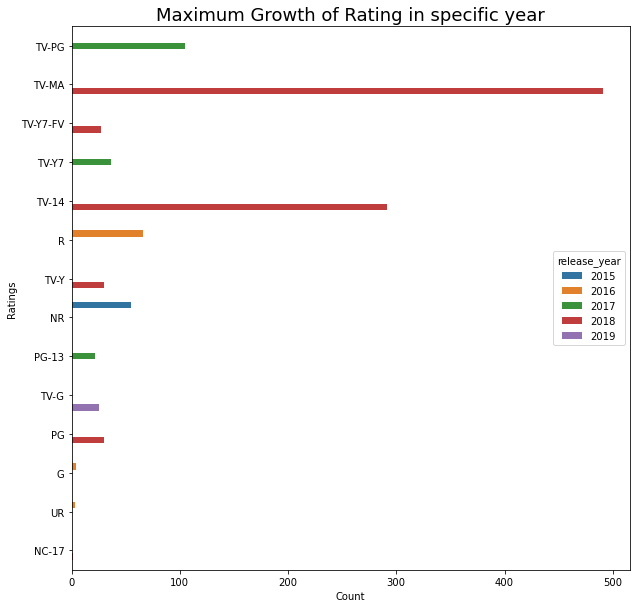

In [24]:
bar, ax = plt.subplots(figsize = (10, 10))
sns.barplot(x = 'count', y ='rating', data = rating, hue = 'release_year')
plt.xlabel('Count')
plt.ylabel('Ratings')
plt.title('Maximum Growth of Rating in specific year', size=18)

# Content Based Recommendation System

In [25]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
import nltk
import re

In [26]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [27]:
data.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [28]:
data['director'] = data['director'].fillna('')
data['cast'] = data['cast'].fillna('')
data['text'] = data['title'] + ' '+data['director'] + ' '+ data['cast']+ ' ' +data['listed_in'] + ' '+data['description']

In [29]:
def preprocess(text):
    text = re.sub('[^A-z]', ' ', text)
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)  
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    filtered_sentence = []  
    for w in word_tokens:  
        if w not in stop_words:  
            filtered_sentence.append(lemmatizer.lemmatize(w))
    filtered = ' '.join([x for x in filtered_sentence])
    return filtered.lower().strip()

In [30]:
data['text'] = data['text'].apply(lambda x : preprocess(x))

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(data['text'])

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(text_features)    

In [33]:
def get_recommendation(movie_name):
        movie_index = data[data['title'] == movie_name].index
        movie_similarity = similarity_matrix[movie_index]
        movie_data = pd.DataFrame({'cosine_similarity':movie_similarity[0], 'index':np.arange(6234)})
        movie_data = movie_data.sort_values(by = 'cosine_similarity', ascending = False)
        topn=10
        movie_ids = movie_data['index'][1:topn]
        recommendation_movies = list()
        for temp in movie_ids:
            movie = data['title'][temp]
            recommendation_movies.append(movie)
        return  recommendation_movies
            

In [34]:
get_recommendation('Transformers: Robots in Disguise')

['Transformers Prime',
 'Hans Zimmer: Live in Prague',
 'Transformers: Cyberverse',
 'The Assassination of Gianni Versace',
 'Lego DC Comics: Batman Be-Leaguered',
 'Yu-Gi-Oh!',
 'American Masters: Ted Williams',
 'Be Here Now',
 'Chappaquiddick']

# Recommendation For Completely New Movie

In [35]:
new_movie = {'movie_name' :'taare zameen par', 'genre' :'childrens film, drama', 'director' :'aamir khan, amole gupte', 'cast' :'Aamir Khan, darsheel safary', 'description':' The film explores the life and imagination of Ishaan, an 8-year-old dyslexic child. Although he excels in art, his poor academic performance leads his parents to send him to a boarding school. Ishaans new art teacher suspects that he is dyslexic and helps him to overcome his disability. Darsheel Safary stars as 8-year-old Ishaan, and Aamir Khan plays his art teacher.'}
new_movie = preprocess(' '.join([x for x in new_movie.values()]))
new_movie_features = vectorizer.transform([new_movie])


all_features = np.concatenate((text_features.toarray(), new_movie_features.toarray()))
similarity_matrix = cosine_similarity(all_features)    
temp = pd.DataFrame({'similarity':similarity_matrix[similarity_matrix.shape[0]-1], 'index':np.arange(6235)})
temp = temp.sort_values(by='similarity', ascending=False)


In [36]:
topn=10
for element in range(1, topn+1):
    index = list(temp['index'])[element]
    print(data['title'][index])

Taare Zameen Par
PK
Dil Chahta Hai
Andaz Apna Apna
Zokkomon
Janaan
Unbroken
Madness in the Desert
Talaash
Lagaan


# > **Please give suggestions and upvote if you like**